In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Anomaly_detection':
  os.chdir(r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Anomaly_detection')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/yz/9_3w8_1j16g4r8mnf_4c_6pm0000gn/T/ipykernel_17061/872324126.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap.py": 1694439058.586277, "/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap_external.py": 1694439058.588179, "/Users/apolloos/anaconda3/lib/python3.11/zipimport.py": 1694439057.809952, "/Users/apolloos/anaconda3/lib/python3.11/codecs.py": 1694439057.572709, "/Users/apolloos/anaconda3/lib/python3.11/encodings/aliases.py": 1694439058.134947, "/Users/apolloos/anaconda3/lib/python3.11/encodings/__init__.py": 1694439058.132963, "/Users/apolloos/anaconda3/lib/python3.11/encodings/utf_8.py": 1694439058.359777, "/Users/apolloos/anaconda3/lib/python3.11/abc.py": 1694439057.54054, "/Users/apolloos/anaconda3/lib/python3.11/io.py": 1694439057.639787, "/Users/apolloos/anaconda3/lib/python3.11/stat.py": 1694439057.744279, "/Users/apolloos/anaconda3/lib/python3.11/_collections_abc.py": 1694439057.519174, "/Users/apolloos/anaconda3/lib/python3.11/genericpath.py": 1694439057.614934, "/Users/apolloos/anaconda3/lib/python3.11/posi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
#| echo: false
set_dir='/Users/apolloos/BDS/Capstone project'
os.chdir(set_dir)
datasets_dir=os.path.abspath('./datasets')
datasets_dir
all_datasets=os.listdir(datasets_dir)
all_datasets.sort()

In [4]:
#| echo: false
all_datasets_path=[os.path.join(datasets_dir,f) for f in all_datasets]

datasets_df=[pd.read_csv(f) for f in all_datasets_path]
datasets_df[0].head(8)

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,0,-20.470767,-49.583696,-49.737023,-60.125877,-67.684702,-67.213115,-75.635206,-75.398126,-45.568737,...,-98.610796,-77.922564,-65.288020,-21.577296,-5.229818,-20.021259,-53.399733,-100.0,-100.0,-100.0
1,1,-4.874715,-37.094569,-25.009528,-35.579886,-33.459741,-35.514754,-33.369469,-35.644538,-51.259983,...,-98.610796,-77.922564,-59.527626,-8.114661,-7.114716,-4.532685,-52.568426,-100.0,-100.0,-100.0
2,2,25.132878,-40.673543,-25.040018,-35.461876,-33.527460,-35.659016,-33.274612,-35.644538,-56.656587,...,-98.610796,-77.922564,-67.083467,22.033657,-17.198404,25.123377,-47.439417,-100.0,-100.0,-100.0
3,3,-90.508732,-76.363862,-25.238204,-35.592998,-33.459741,-35.593443,-33.396572,-35.552789,-52.903776,...,-98.610796,-77.922564,-98.546543,-85.325157,-41.011974,-91.739428,-93.192691,-100.0,-100.0,-100.0
4,4,-95.641610,-62.582329,-24.963793,-35.488101,-33.459741,-35.449180,-33.369469,-35.552789,-56.377452,...,-98.610796,-77.922564,-82.718820,-92.213349,-24.248745,-96.082302,-70.919928,-100.0,-100.0,-100.0
5,5,-95.641610,-52.914129,-24.963793,-35.474989,-33.419110,-35.580328,-33.342367,-35.592110,-53.973792,...,-98.610796,-77.922564,-82.718820,-92.213349,-24.336295,-96.082302,-67.704494,-100.0,-100.0,-100.0
6,6,-99.422931,-79.731577,-24.979038,-35.658559,-33.513916,-35.501639,-33.383021,-35.618324,-54.609599,...,-98.610796,-77.922564,-80.784439,-93.639475,-26.154242,-97.555235,-64.818446,-100.0,-100.0,-100.0
7,7,-99.422931,-79.731577,-25.161979,-35.501213,-33.378479,-35.475410,-33.355918,-56.982764,-54.547569,...,-98.610796,-77.922564,-80.784439,-93.625214,-25.438393,-97.555235,-61.101090,-100.0,-100.0,-100.0


In [5]:
#| echo: false
##data set 13 and 7 have two files, we will concat two files as they are the data from individual experiment
#notice two files for C7 (index:6&7) and C13(index:1&2) run to failure exp
#concat the two data files

datasets=[]
for f in range(len(datasets_df)):
  if f==1 or f==6:
    datasets.append(pd.concat([datasets_df[f],datasets_df[f+1]]))
  else:
    datasets.append((datasets_df[f]))

##delete the C7-2 and C13_2 files:
ind=[2,7]
datasets=[datasets[i] for i in range(len(datasets)) if i not in ind]
#print(len(datasets)) ## 8 datasets from 8 run-to-failure experiment

In [6]:
#| echo: false
for i, test_df in enumerate(datasets):
  col_names=list(test_df.columns)
  for i in col_names:
    test_df[i].fillna(test_df[i].mean(), inplace=True)

In [7]:
exp_names=[all_datasets[i] for i in range(len(all_datasets)) if i not in ind]

In [8]:
# we divide total timestamps into four equal parts and label each part to describe the condition of the machine
def labeler(i):
  if i<= test_df.shape[0]//4:
    return 0
  elif i>test_df.shape[0]//4 and i <= 2*(test_df.shape[0]//4):
   return 1
  elif i > 2*(test_df.shape[0]//4) and i <= 3*(test_df.shape[0]//4):
    return 2
  else:
    return 3
for i, test_df in enumerate(datasets):
  test_df['machine_condition']=test_df.Timestamp.apply(labeler)
  col=test_df.pop('machine_condition')
  test_df.insert(1, 'machine_condition', col)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error
def roc_scores():
  X_train, X_test, y_train, y_test=train_test_split(test_df.iloc[:,2:], test_df['machine_condition'], train_size=0.8, random_state=0)
  # univariate roc_auc
  df_roc_values=pd.DataFrame()
  roc_values = []
  for feature in X_test.columns:
    # if feature=='L_10':
    dtc=DecisionTreeClassifier()
    dtc.fit(X_train[feature].to_frame(), y_train)
    y_pred_prob=dtc.predict_proba(X_test[feature].to_frame())

    #extracting roc values for multiclass output var
    for class_idx in range(y_pred_prob.shape[1]):
      class_roc_scores = []
      y_true_class = (y_test == class_idx).astype(int)  # Convert to binary classification
      y_pred_class = y_pred_prob[:, class_idx]
      y_true_class = np.array(y_true_class)
      y_pred_class = np.array(y_pred_class)
      class_score=roc_auc_score(y_true_class, y_pred_class)
      class_roc_scores.append(class_score)

      # print(f"ROC AUC Score for Class {class_idx}: {auc_score}")

    # Average ROC AUC score across all classes
    avg_score = sum(class_roc_scores) / len(class_roc_scores)
    roc_values.append(avg_score)
  roc_values=pd.Series(roc_values)
  return roc_values

In [10]:
df_roc=pd.DataFrame()
for i, test_df in enumerate(datasets):
  roc_series=roc_scores()
  df_roc=pd.concat([df_roc, roc_series], axis=1)
  # print(df_roc)
df_roc.index=datasets[0].iloc[:,2:].columns
df_roc.columns=exp_names
df_roc = df_roc.T
df_roc.head(5)

,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,A_4,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
C11.csv,0.989719,0.800622,0.716381,0.805171,0.621604,0.612124,0.744775,0.715891,0.692415,0.808485,...,0.980403,0.816665,0.887565,0.963003,0.730728,0.982077,0.666120,0.625770,0.948750,0.624316
C13-1.csv,0.989258,0.835711,0.629530,0.790779,0.805771,0.766042,0.547736,0.768802,0.642763,0.707533,...,0.887741,0.985232,0.774679,0.635377,0.548002,0.911593,0.677480,0.670073,0.665349,0.659305
C14.csv,0.992529,0.781165,0.557617,0.687565,0.687223,0.689019,0.660716,0.690027,0.533338,0.686555,...,0.988066,0.894792,0.896809,0.685654,0.540606,0.904820,0.693794,0.831570,0.807473,0.852070
C15.csv,0.993361,0.931253,0.554749,0.858519,0.638526,0.862530,0.546365,0.662041,0.774243,0.836862,...,0.842338,0.634486,0.986360,0.649579,0.549271,0.902103,0.573459,0.571417,0.627396,0.593993
C16.csv,0.992478,0.842233,0.874162,0.840800,0.605960,0.840122,0.879170,0.707794,0.858725,0.817181,...,0.950300,0.795837,0.942829,0.653904,0.537704,0.926012,0.575221,0.704839,0.627433,0.703330


In [11]:
# selecting features with highest average roc score across all run-to-failure experiments
df_roc.mean().sort_values(ascending=False)[0:5]

L_1    0.993399
L_9    0.937474
L_3    0.933457
L_4    0.927554
L_6    0.893747
dtype: float64

In [12]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i, data in enumerate(datasets):
  data.iloc[:,2:]=ss.fit_transform(data.iloc[:,2:])

In [13]:
datasets_autoencoder=[]
for i,data in enumerate(datasets):
  data=data.loc[:,['Timestamp','L_1','L_9','L_3','L_4','L_6']]
  datasets_autoencoder.append(data)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [15]:
# we are not using train test split, because we want the representative data when machine is in best condition
# so we select first 5% timestamp of every experiments
training_data = np.vstack([data.iloc[:int(0.05 * len(data)),1:] for k,data in enumerate(datasets_autoencoder)])

transformed_data = pca.fit_transform(training_data)

# Calculate reconstruction errors for train_data
reconstructed_data = pca.inverse_transform(transformed_data)
reconstruction_errors = np.mean(np.square(training_data - reconstructed_data), axis = 1)

In [16]:
# Setting threshold for anomaly detection, in real-world is set manually based on the previous data of the machines
threshold = np.percentile(reconstruction_errors, 99.99)
print('threshold for anomaly detection:', threshold)

threshold for anomaly detection: 2.2508852337037815


                                                                    
                                                                    
=====================dataset C11.csv ========================
timestamp duration: 0 to 18429


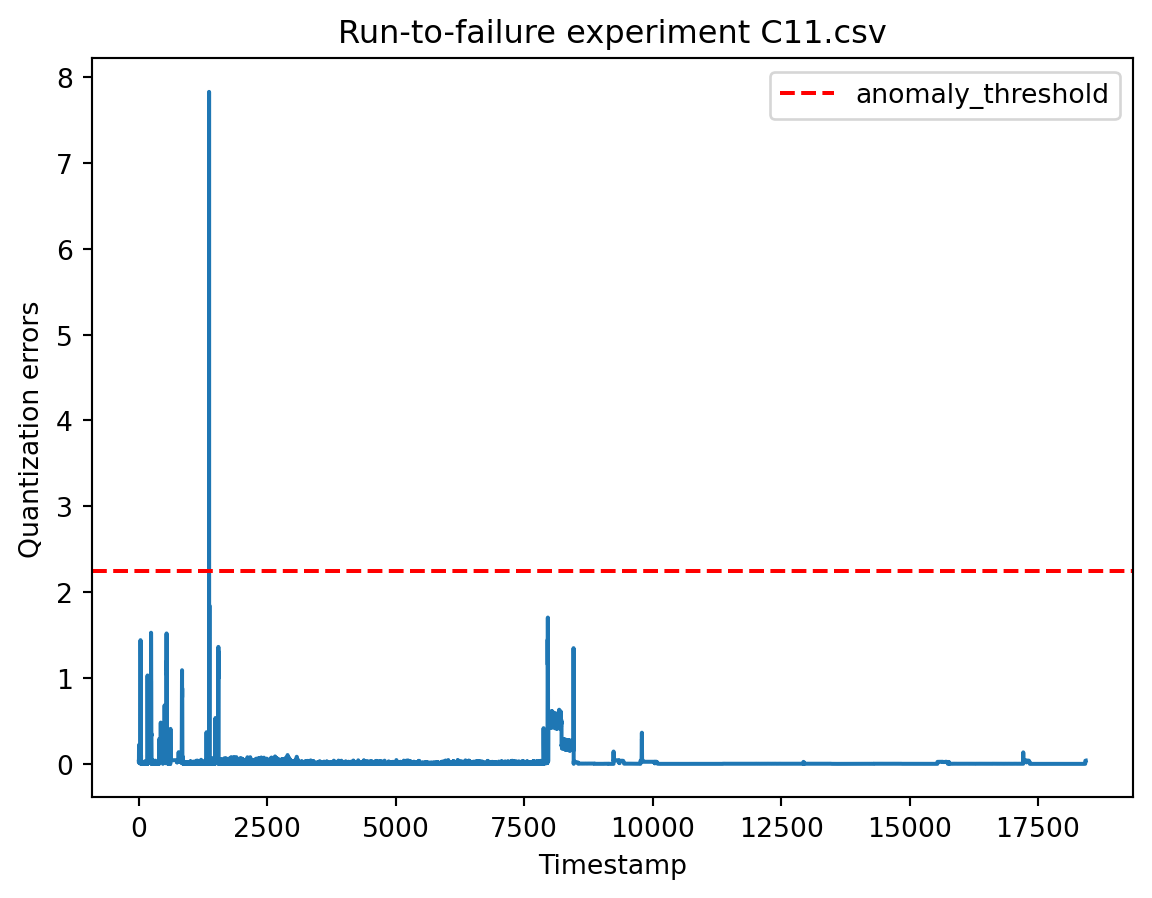

No anomaly detected
                                                                    
                                                                    
=====================dataset C13-1.csv ========================
timestamp duration: 0 to 23670


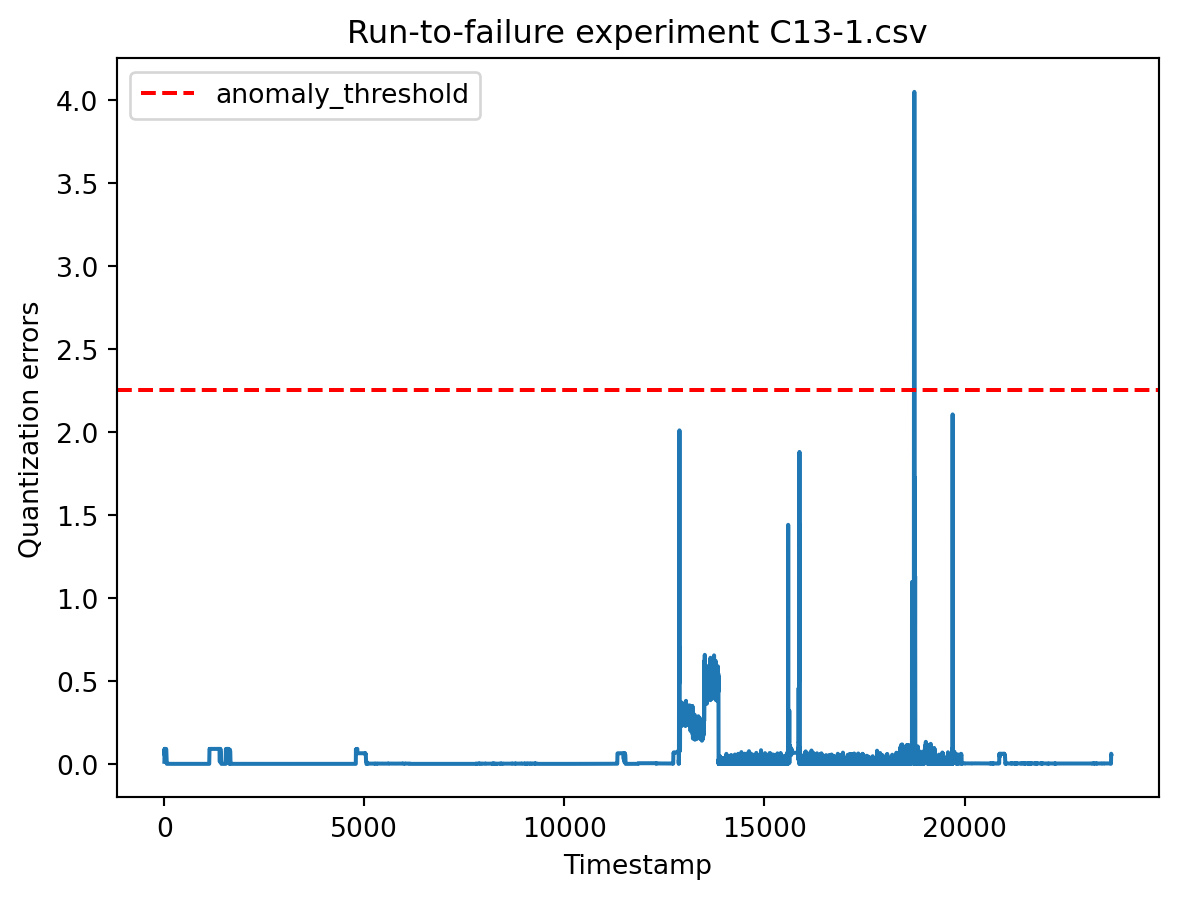

First instance of anomaly detected at Timestamp: 18737
                                                                    
                                                                    
=====================dataset C14.csv ========================
timestamp duration: 0 to 32848


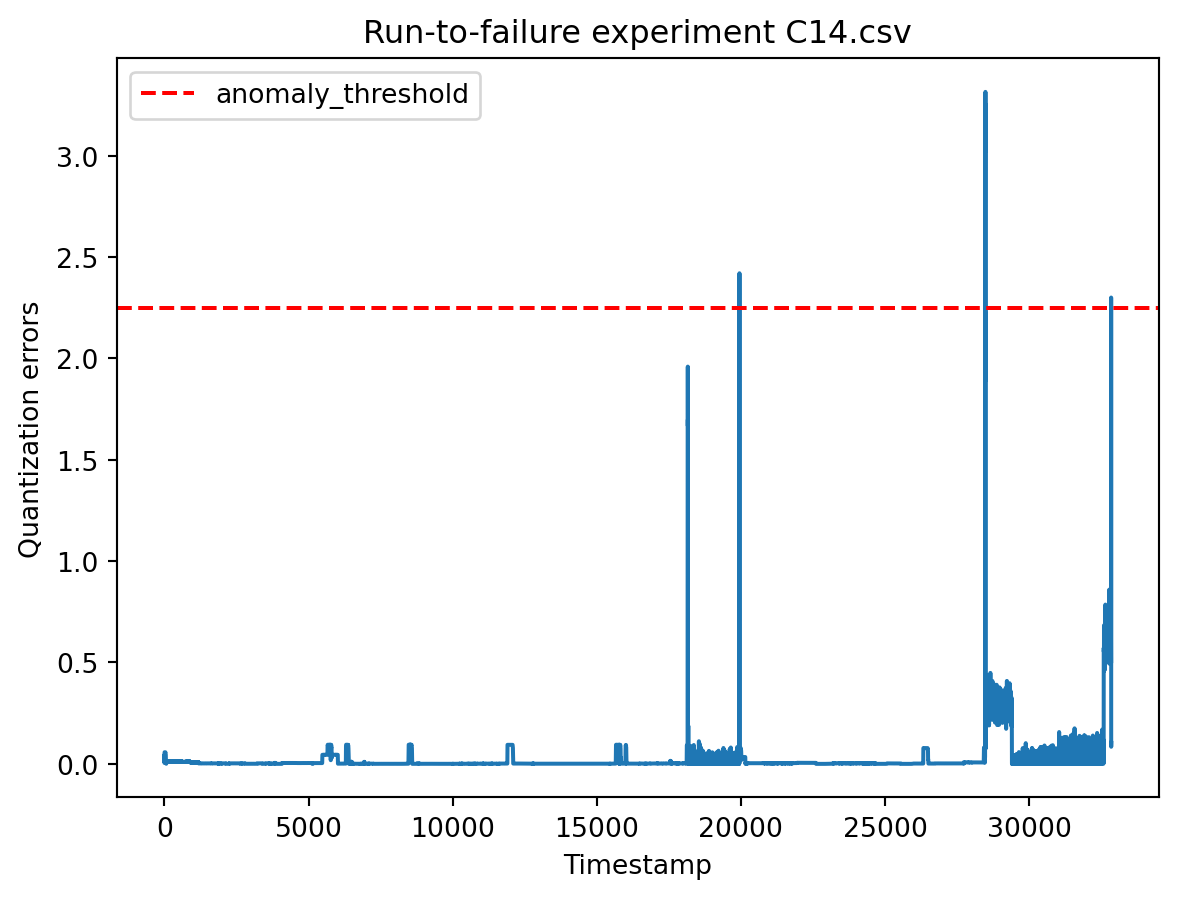

First instance of anomaly detected at Timestamp: 28477
                                                                    
                                                                    
=====================dataset C15.csv ========================
timestamp duration: 0 to 30737


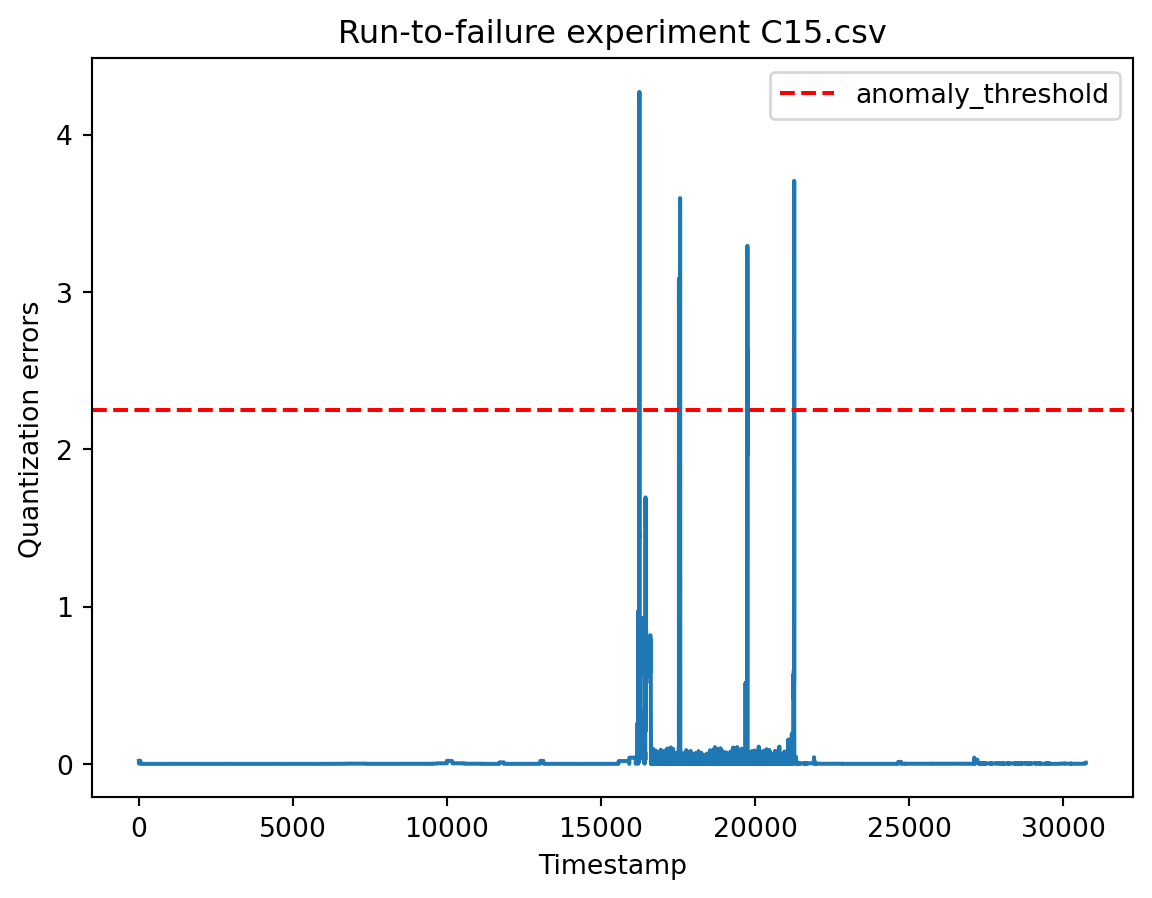

First instance of anomaly detected at Timestamp: 16244
                                                                    
                                                                    
=====================dataset C16.csv ========================
timestamp duration: 0 to 21021


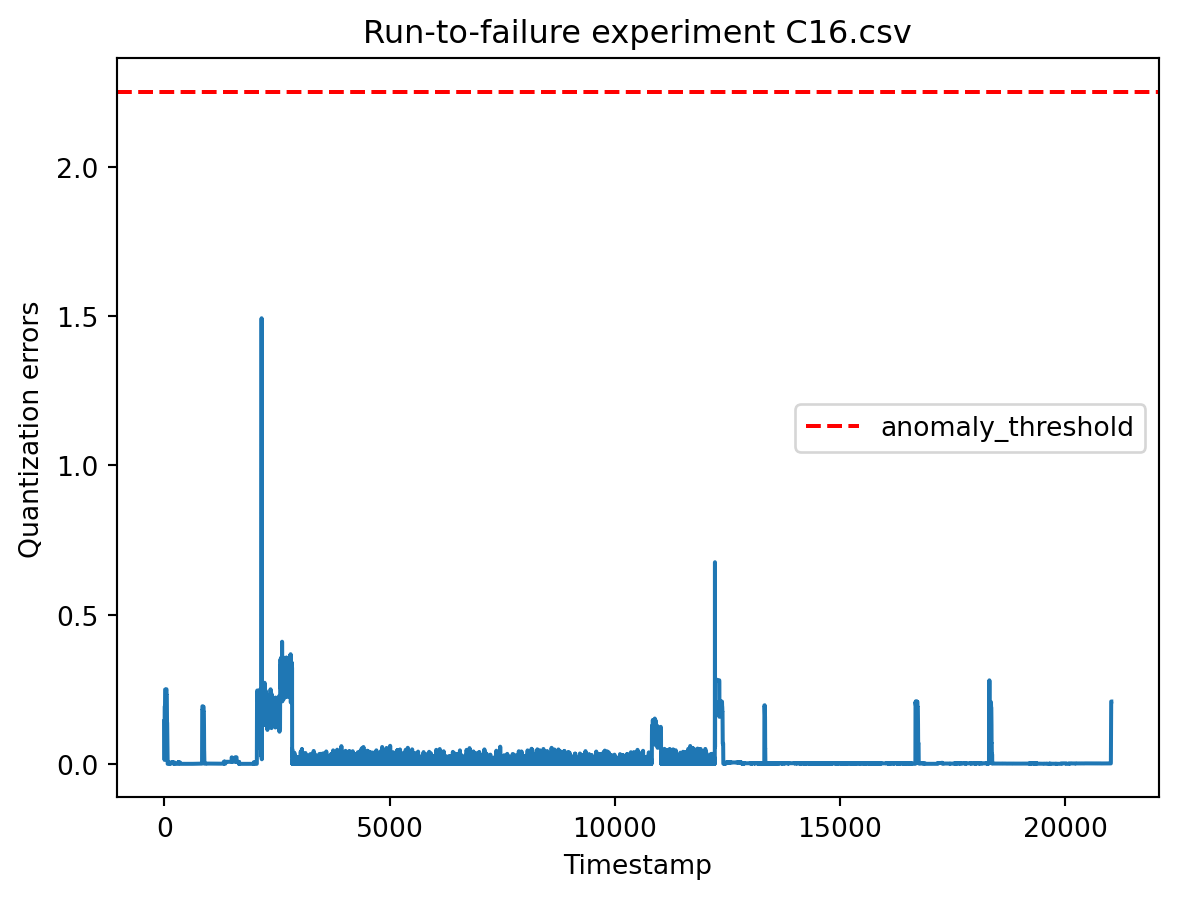

No anomaly detected
                                                                    
                                                                    
=====================dataset C7-1.csv ========================
timestamp duration: 0 to 51671


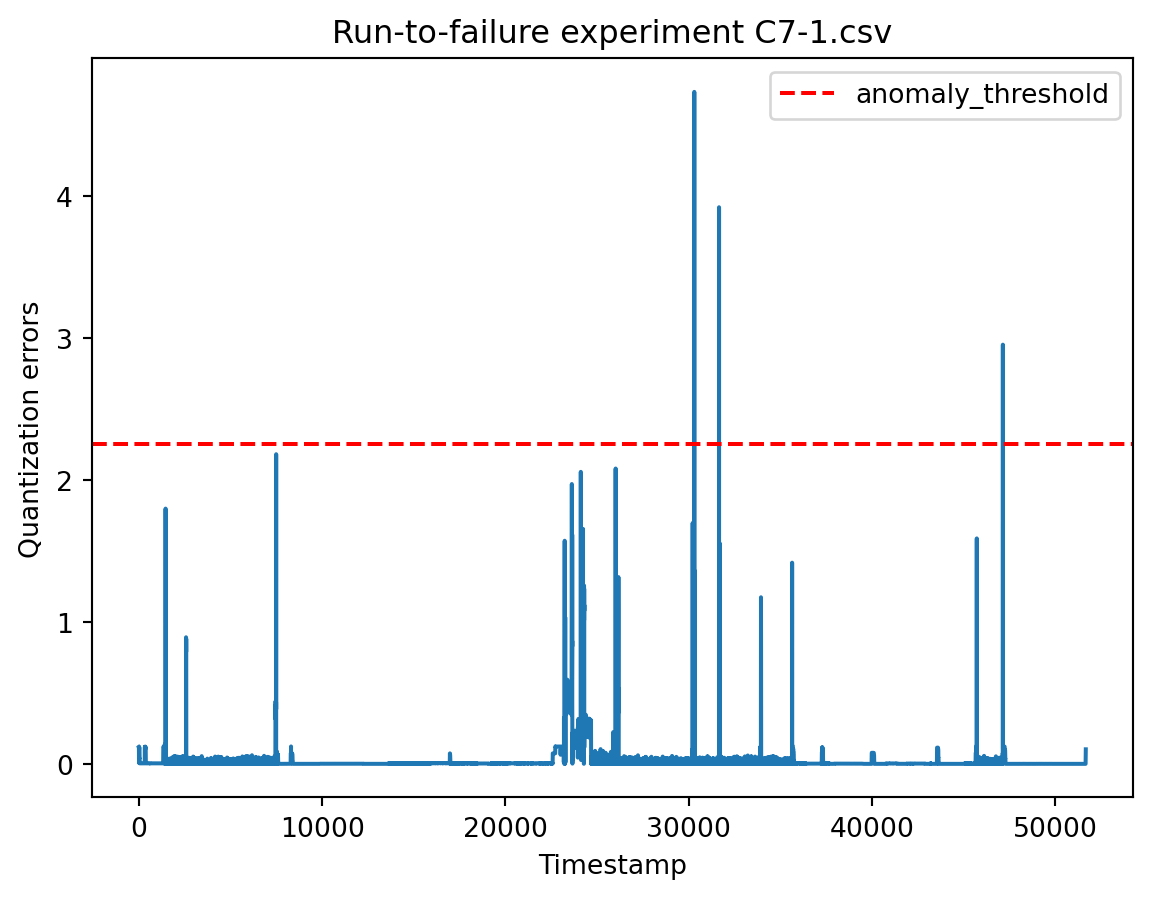

First instance of anomaly detected at Timestamp: 31657
                                                                    
                                                                    
=====================dataset C8.csv ========================
timestamp duration: 0 to 15803


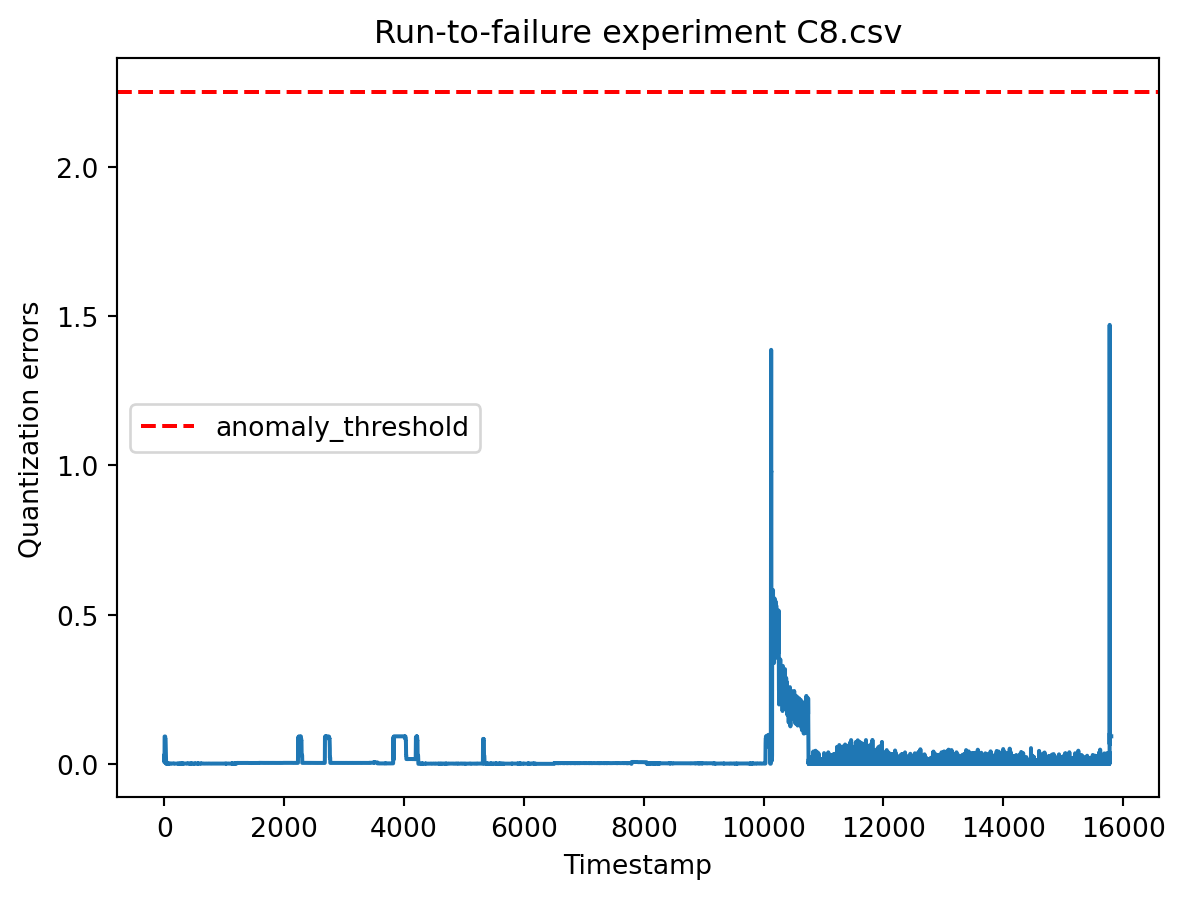

No anomaly detected
                                                                    
                                                                    
=====================dataset C9.csv ========================
timestamp duration: 0 to 34245


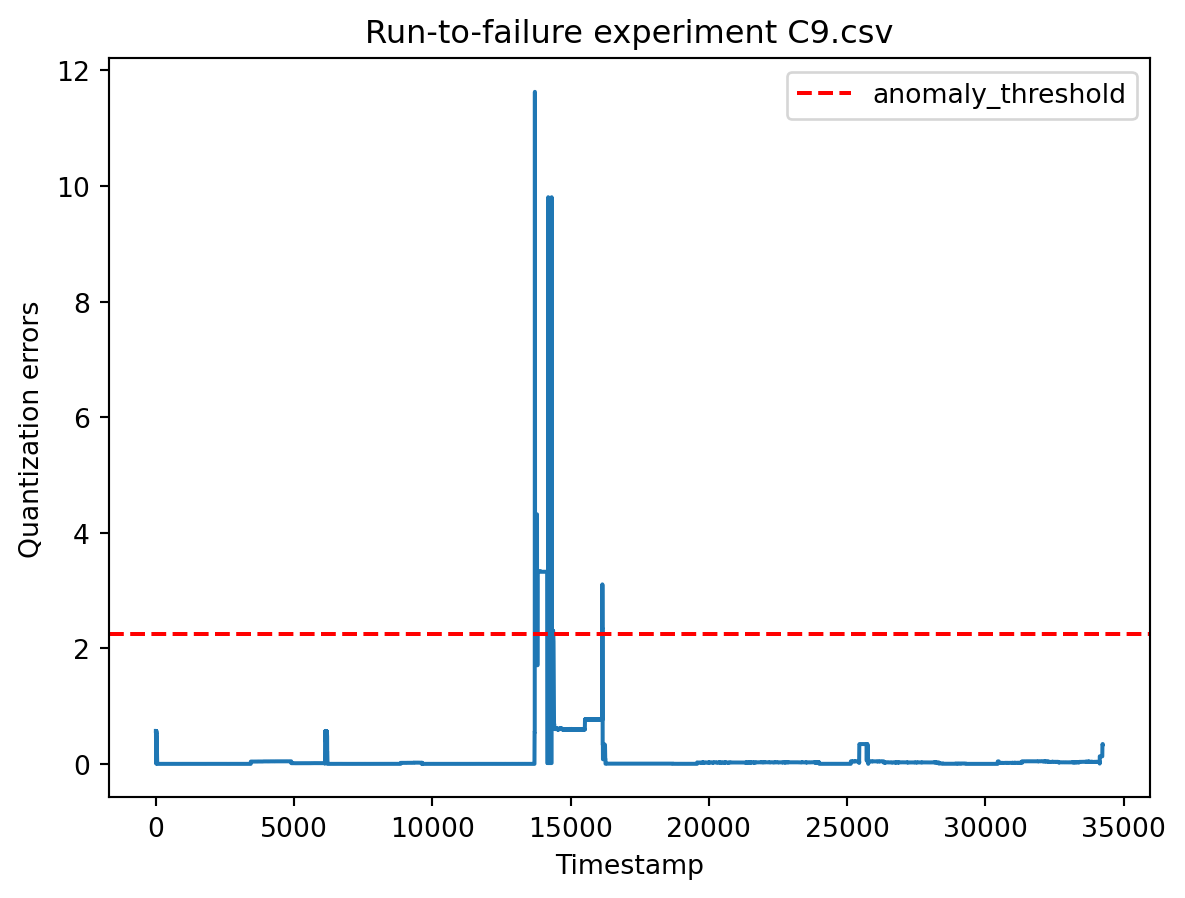

First instance of anomaly detected at Timestamp: 13702


In [17]:
for i, data_set in enumerate(datasets_autoencoder):
  print('                                                                    ')
  print('                                                                    ')
  print('=====================dataset',exp_names[i],'========================')
  # Detect anomalies in new_data
  transformed_data = pca.fit_transform(data_set.iloc[:,1:].values)
  new_data_reconstructed = pca.inverse_transform(transformed_data)
  new_data_errors = np.mean(np.square(data_set.iloc[:,1:].values - new_data_reconstructed), axis=1)
  #print(len(new_data_errors)==data_set.shape[0])
  print('timestamp duration: 0 to', data_set.shape[0])
  anomaly_timestamp=[]
  for j in range(len(new_data_errors)):
    if new_data_errors[j] > threshold:
      anomaly_timestamp.append(j)
  plt.plot(range(len(data_set.index)), new_data_errors)
  plt.axhline(y=threshold, color='red', linestyle='--', label='anomaly_threshold'.format(threshold))
  plt.xlabel('Timestamp')
  plt.ylabel('Quantization errors')
  plt.title('Run-to-failure experiment '+exp_names[i])
  plt.legend()
  plt.show()

  if len(anomaly_timestamp)<=1:
    print('No anomaly detected')
    continue
  else:
    for k in range(len(anomaly_timestamp)-1):
      if anomaly_timestamp[k+1]-anomaly_timestamp[k]<=10:
        print('First instance of anomaly detected at Timestamp:', anomaly_timestamp[k])
        break